# Проект "Выгрузка данных для анализа из базы данных сайта StackOverFlow"

## Описание проекта

Вы будете работать со схемой tools_shop базы данных интернет-магазина по продаже инструментов.

Требуется выгрузить наборы данных и некоторые метрики из базы за определённый период.



## План работы

1. Настроить соединение с базой данных.
2. Выгрузить необходимые данные.
  1. 


## Описание данных

Необходимые данные содержатся в таблицах **badges**, **post_types**, **posts**, **users**, **vote_types**, **votes** схемы **stackoverflow**.

## Описание данных

[ER-диаграмма и описание базы данных](https://github.com/AVRotaev/Portfolio/blob/main/Data_export_PostgreSQL/DB_ER-diagram_describe.pdf)
[ER-диаграмма схемы tools_shop](https://github.com/AVRotaev/Portfolio/blob/main/Data_export_PostgreSQL/DB_ER-diagram.png

**Схема online_store**

Таблица **profiles**

Содержит данные о пользователях магазина.


- **user_id** - Идентификатор пользователя, первичный ключ таблицы
- **first_ts** - Дата и время первого посещения
- **channel** - Канал привлечения
- **device** - Тип устройства пользователя
- **region** - Регион пользователя
- **dt** - Дата первого посещения
- **month** - Месяц первого посещения
- **payer** Информация о том, совершал ли пользователь хотя бы одну покупку

Таблица **sessions**

Содержит данные о сессиях пользователей на сайте магазина.

- **user_id** - Идентификатор пользователя
- **region** - Регион посещения
- **channel** - Канал сессии
- **device** - Тип устройства сессии
- **session_duration** - Длительность сессии в секундах
- **session_start** - Дата и время старта сессии

Таблица **events**

Содержит данные о событиях.

- **user_id** Идентификатор пользователя
event_dt Дата и время события
event_name Название события
Типов рассылки в поле event_name всего два:
onboarding — обязательная рассылка для каждого пользователя, которую
отправляют самой первой и только один раз;
sale_offer — рассылка пользователям специальных предложений.
Описание базы и ER-диаграмма для теоретической части Продвинутого SQL 3
Таблица orders
Содержит данные о заказах клиентов.
Поле Описание
user_id Идентификатор пользователя
event_dt Дата и время оформления заказа
revenue Сумма заказа
Таблица costs
Содержит данные о стоимости привлечения новых пользователей.
Поле Описание
dt Дата
channel Канал привлечения
costs Стоимость привлечения
Схема tools_shop
Таблица users
Содержит данные о пользователях.
Поле Описание
user_id Идентификатор пользователя, первичный ключ таблицы
first_name Имя пользователя
last_name Фамилия пользователя
email Электронный адрес пользователя
created_at Дата создания аккаунта пользователя
Таблица events
Содержит данные о событиях.
Поле Описание
event_id Идентификатор события, первичный ключ таблицы
Описание базы и ER-диаграмма для теоретической части Продвинутого SQL 4
Поле Описание
event_time Дата и время события
event_name Название события
user_id Идентификатор пользователя, внешний ключ, отсылающий к
таблице users
platform Тип устройства пользователя
referrer Источник события пользователя
Таблица event_x_event_parameter
Содержит детальную информацию о событиях.
Поле Описание
event_id Идентификатор события, внешний ключ, отсылающий к таблице
events
parameter_name Параметр детализации
parameter_value Значение параметра
Таблица orders
Содержит детальные данные о заказах пользователей.
Поле Описание
order_id Идентификатор заказа, первичный ключ таблицы
user_id Идентификатор пользователя, оформившего заказ
total_amt Общая сумма заказа
items_cnt Количество товаров в заказе
created_at Дата, когда пользователь оформил заказ, но ещё не оплатил его
paid_at Дата оплаты заказа
Таблица items
Содержит данные о товарах.
Поле Описание
item_id Идентификатор товара, первичный ключ таблицы
Описание базы и ER-диаграмма для теоретической части Продвинутого SQL 5
Поле Описание
category Категория товара
item_name Название товара
price Стоимость
Таблица order_x_item
Содержит данные о связи заказа с товарами.
Поле Описание
order_id Идентификатор заказа, внешний ключ, отсылающий к таблице
orders
item_id Идентификатор товара, внешний ключ, отсылающий к таблице
items
Таблица costs
Содержит данные о стоимости привлечения пользователей.
Поле Описание
created_at Дата
costs Стоимость привлечения

In [ ]:
!pip install hide_code


In [20]:
db_config = {
    'user':'postgres',
    'pwd':'lex374239',
    'host':'localhost',
    'port':5432,
    'db':'practicum_89da'
}


SyntaxError: invalid syntax (Temp/ipykernel_8508/4085935148.py, line 8)

In [1]:
!pip install sqlalchemy
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

from sqlalchemy import create_engine

In [2]:
db_config = { 
    'user': 'praktikum_student', # имя пользователя 
    'pwd': 'Sdf4$2;d-d30pp', # пароль 
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
    'port': 6432, # порт подключения 
    'db': 'data-analyst-advanced-sql' # название базы данных 
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format( 
    db_config['user'], 
    db_config['pwd'], 
    db_config['host'], 
    db_config['port'], 
    db_config['db'], 
)

engine = create_engine(connection_string)

query = '''
WITH profile AS
  (SELECT u.user_id,
          DATE_TRUNC('month', MIN(event_time))::date AS start_mn
   FROM tools_shop.users u
   JOIN tools_shop.orders o ON u.user_id = o.user_id
   JOIN tools_shop.events e ON u.user_id = e.user_id
   GROUP BY 1), 
sessions AS
  (SELECT start_mn,
          DATE_TRUNC('month', event_time)::date AS event_mn,
          COUNT(DISTINCT p.user_id) AS users_cnt
   FROM profile p
   JOIN tools_shop.events e ON p.user_id = e.user_id
   GROUP BY 1,
            2)
SELECT start_mn,
       event_mn,
       users_cnt,
       LAG(users_cnt) OVER (PARTITION BY start_mn ORDER BY event_mn) AS previous_day_users_cnt,
       ROUND((1 - (users_cnt::numeric / LAG(users_cnt) OVER (PARTITION BY start_mn ORDER BY event_mn))) * 100, 2) AS churn_rate
FROM sessions
WHERE start_mn BETWEEN '2018-01-01' AND '2018-06-01'
  AND event_mn BETWEEN '2018-01-01' AND '2018-12-01';
'''

df = pd.read_sql_query(query, con=engine)



In [3]:
df.head(30)

,start_mn,event_mn,users_cnt,previous_day_users_cnt,churn_rate
0,2018-01-01,2018-01-01,257,NaN,NaN
1,2018-01-01,2018-02-01,67,257.0,73.93
2,2018-01-01,2018-03-01,41,67.0,38.81
3,2018-01-01,2018-04-01,44,41.0,-7.32
4,2018-01-01,2018-05-01,42,44.0,4.55
5,2018-01-01,2018-06-01,21,42.0,50.00
6,2018-01-01,2018-07-01,11,21.0,47.62
7,2018-01-01,2018-08-01,3,11.0,72.73
8,2018-02-01,2018-02-01,226,NaN,NaN
9,2018-02-01,2018-03-01,59,226.0,73.89


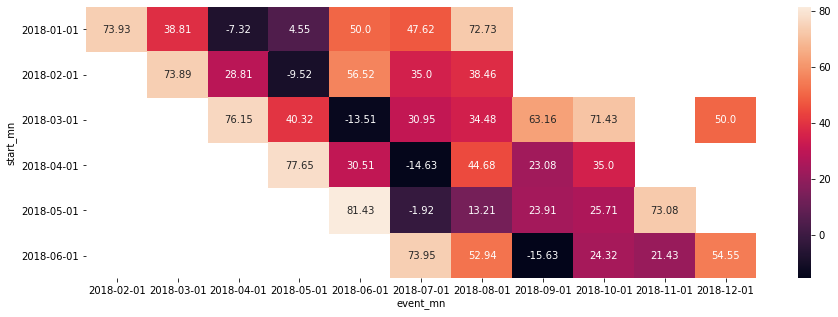

In [4]:
pivot = df.pivot_table(index = 'start_mn', columns='event_mn', values='churn_rate')


plt.figure(figsize=(15, 5))
pivot
sns.heatmap(pivot, annot=True,  fmt='')
plt.show;